In [66]:
# import pip

In [67]:
# pip.main(["install", "openpyxl"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


You should consider upgrading via the 'c:\Python39\python.exe -m pip install --upgrade pip' command.


0

In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [90]:
#path = Path.cwd().joinpath("Raw_sensing_data","CO","Cu-COF-DC-8","N2_dry").rglob("*.xlsx")

#for i in path:
#    print(i)

c:\github things\cof-sensor-array-v2\Raw_sensing_data\CO\Cu-COF-DC-8\N2_dry\original\Cu-COF_CO_80ppm_dryN2_device_2.xlsx
c:\github things\cof-sensor-array-v2\Raw_sensing_data\CO\Cu-COF-DC-8\N2_dry\original\Cu-COF_CO_80ppm_dryN2_device_5.xlsx
c:\github things\cof-sensor-array-v2\Raw_sensing_data\CO\Cu-COF-DC-8\N2_dry\reproducibility\GB_S_I_183_Cu-COF-DC-8_CO_80ppm_dryN2.xlsx


In [5]:
def read_data(cof, gas, carrier, ppm):

    # get path to appropriate file
    path = Path.cwd().joinpath("Raw_sensing_data",gas,cof,carrier,).rglob("*.xlsx")
    #print(path)
    # some folders contain multiple excel files, so append all to a list
    files = []
    for file in path:
        files.append(file)
    print(files)
    # extract data from Excel files in list
    dfs = []
    for p in files:
        df = pd.read_excel(p,header=6,names=['time','DeltaG/G0'],usecols="B,D")
       
        df = df.dropna()
        dfs.append(df)
        
        
    return dfs
# returns pandas data frame with this data. two columns: time, DeltaG/G0

In [37]:
#print(read_data("Cu-COF-DC-8","CO","N2_dry",80))

data = read_data("Cu-COF-DC-8","H2S","air_dry",80)

[WindowsPath('c:/github things/cof-sensor-array-v2/Raw_sensing_data/H2S/Cu-COF-DC-8/air_dry/GB_S_I_186_2_Cu-COF-DC-8_H2S_80ppm_dryair.xlsx')]


          time     DeltaG/G0
0          0.5     -4.777679
1          1.0     -4.777679
2          1.5     -4.696914
3          2.0     -4.669704
4          2.5     -4.561729
...        ...           ...
46842  23421.5 -15250.249422
46843  23422.0 -15261.046926
46844  23422.5 -15252.927203
46845  23423.0 -15255.648174
46846  23423.5    100.000000

[46505 rows x 2 columns]


<AxesSubplot:xlabel='time'>

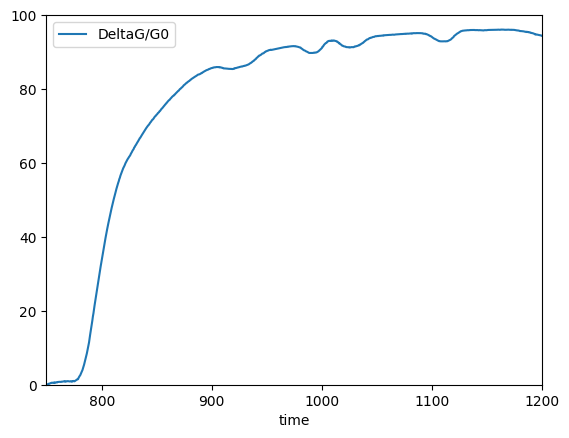

In [54]:
print(data[0])
data[0].plot(x='time',y='DeltaG/G0',xlim=(749.5,1200),ylim=(0,100))

#fig, ax = plt.subplots()
#ax.plot(data[0][0],data[0][1])
#plt.show()


In [ ]:
class SensorResponse:
    def _init_(self, cof, gas, carrier_gas, ppm):
        self.cof = cof
        self.gas = gas
        self.carrier_gas = carrier_gas
        self.ppm = ppm

        self.data = read_data(cof,gas,carrier_gas,ppm)
        
     # read in the data, do processing to get the features.
     # store data here too for viz
        


    def compute_initial_slope(self, nb_pts):
        
   #def compute_saturation(self):
   #def compute_area(self):
   #def viz(self, save=False): # viz the data along with the response features or function u fit to it.
   #def vector_representation(self): # returns the vector characterizing the response.